In [3]:
import matplotlib.pyplot as plt
import numpy as np
import types # used to re-define acceleration / force

from mpl_toolkits.mplot3d.axes3d import Axes3D

%matplotlib inline

In [4]:
class EventState:
    def __init__(self, t, r, v):
        self.t = t
        self.r = r
        self.v = v

    def __repr__(self):
        return '(t = {}, r = {}, v = {})'.format(self.t, self.r, self.v)

    @property
    def time(self):
        return self.t

    @property
    def position(self):
        return self.r

    @property
    def velocity(self):
        return self.v

In [5]:
class RigidBody:
    def __init__(self, t0=0, r0=np.array([0,0,0]), v0=np.array([0,0,0])):
        self.initial = EventState(t0, r0, v0)
        self.worldline = [self.initial]

    def lub(self, time, precision=5):
        for event in sorted(self.worldline, key=lambda e: e.time):
            if round(event.time, precision) >= round(time, precision):
                return event
        return None

    def r(self, time):
        return self.lub(time).position

    def v(self, time):
        return self.lub(time).velocity

    def a(self, time):
        return np.array([0,0,0])

    def increment(self, dt, n=1):
        for i in range(n):
            if len(self.worldline) == 1:            
                t = self.initial.time
                r = self.initial.position + self.initial.velocity * dt/2
                v = self.initial.velocity + self.a(t) * dt/2
                self.worldline.append(EventState(t + dt/2, r, v))
            else:
                t = max([ev.time for ev in self.worldline])

                t = t + dt/2
                next_r = self.r(t - dt) + self.v(t - dt/2) * dt
                next_v = self.v(t - dt/2) + self.a(t - dt/2) * dt/2
                self.worldline.append(EventState(t, next_r, next_v))

                t = t + dt/2
                next_r = self.r(t - dt/2) + self.v(t - dt/2) * dt/2
                next_v = self.v(t - dt) + self.a(t - dt/2) * dt
                self.worldline.append(EventState(t, next_r, next_v))

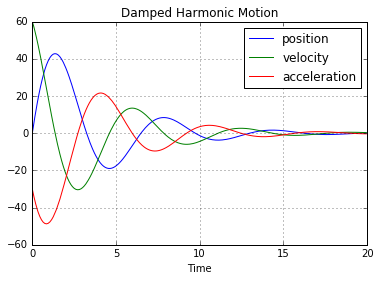

In [6]:
obj = RigidBody(v0=np.array([60,0,0]))
obj.a = lambda t: -obj.lub(t).position - 0.5 * obj.lub(t).velocity
obj.increment(dt=0.1,n=200)
        
data = [(ev.t, ev.r, ev.v) for ev in obj.worldline]
t, r, v = zip(*data)
a = [obj.a(ev.t) for ev in obj.worldline]

rx, ry, rz = zip(*r)
vx, vy, vz = zip(*v)
ax, ay, az = zip(*a)

plt.plot(t, rx, label='position')
plt.plot(t, vx, label='velocity')
plt.plot(t, ax, label='acceleration')
plt.xlabel('Time')
# plt.title('Damped Harmonic Motion', position=[0.5, 1.05], fontsize=20, fontweight='bold')
plt.title('Damped Harmonic Motion')
plt.legend(numpoints=1)
plt.grid(True)

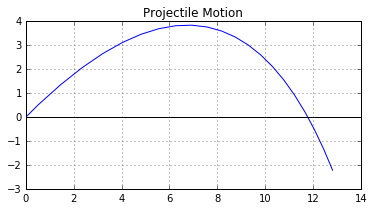

In [7]:
obj = RigidBody(t0=0, r0=np.array([0,0]), v0=np.array([10,10]))
obj.a = lambda t: np.array([0,-9.8]) - 0.5 * obj.lub(t).velocity
obj.increment(dt=0.1, n=21)
    
data = [(ev.t, ev.r, ev.v) for ev in obj.worldline]
t, r, v = zip(*data)
a = [obj.a(ev.t) for ev in obj.worldline]

rx, ry = zip(*r)
vx, vy = zip(*v)
ax, ay = zip(*a)

plt.plot(rx, ry, 'b-', label='position')
# plt.plot(rx[::4], ry[::4], 'b.')
plt.title("Projectile Motion")
plt.axes().set_aspect('equal')
plt.axes().axhline(0, c='k')
plt.axes().axvline(0, c='k')
plt.grid(True)

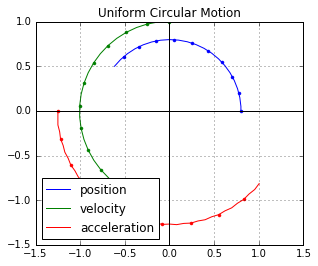

In [10]:
obj = RigidBody(t0=0, r0=np.array([0.8,0]), v0=np.array([0,1]))

def a(self, time):
    rx, ry = self.r(time)
    vx, vy = self.v(time)
    rmag2 = rx ** 2 + ry ** 2
    vmag2 = vx ** 2 + vy ** 2
    return -np.array([rx, ry]) * vmag2 / rmag2
        
obj.a = types.MethodType(a, obj)
obj.increment(dt=0.1, n=20)
    
data = [(ev.t, ev.r, ev.v) for ev in obj.worldline]
t, r, v = zip(*data)
a = [obj.a(ev.t) for ev in obj.worldline]

rx, ry = zip(*r)
vx, vy = zip(*v)
ax, ay = zip(*a)

plt.plot(rx, ry, 'b-', label='position')
plt.plot(rx[::4], ry[::4], 'b.')
plt.plot(vx, vy, 'g-', label='velocity')
plt.plot(vx[::4], vy[::4], 'g.')
plt.plot(ax, ay, 'r-', label='acceleration')
plt.plot(ax[::4], ay[::4], 'r.')
plt.title("Uniform Circular Motion")
plt.legend(loc='lower left',numpoints=1)
plt.axes().set_aspect('equal')
plt.axes().axhline(0, c='k')
plt.axes().axvline(0, c='k')
plt.grid(True)

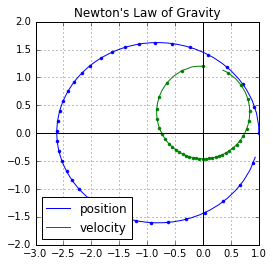

In [8]:
obj = RigidBody(t0=0, r0=np.array([1,0]), v0=np.array([0,1.2]))

def a(self, time):
    x, y = self.r(time)
    d = np.sqrt( x ** 2 + y ** 2 )
    return -np.array([x,y]) / d ** 3

obj.a = types.MethodType(a, obj)
obj.increment(dt=0.2, n=75)

data = [(ev.t, ev.r, ev.v, obj.a(ev.t)) for ev in obj.worldline]
t, r, v, a = zip(*data)

rx, ry = zip(*r)
vx, vy = zip(*v)
ax, ay = zip(*a)

plt.plot(rx, ry, 'b-', label='position')
plt.plot(rx[::4], ry[::4], 'b.')
plt.plot(vx, vy, 'g-', label='velocity')
plt.plot(vx[::4], vy[::4], 'g.')
# plt.plot(ax, ay, 'r-', label='acceleration')
# plt.plot(ax[::4], ay[::4], 'r.')
plt.title("Newton's Law of Gravity")
plt.legend(loc='lower left',numpoints=1)
plt.axes().set_aspect('equal')
plt.axes().axhline(0, c='k')
plt.axes().axvline(0, c='k')
plt.grid(True)

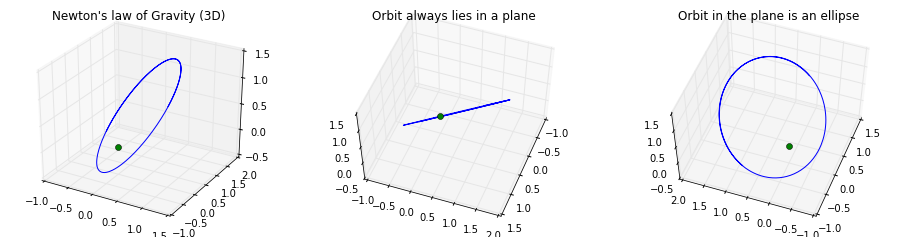

In [41]:
obj = RigidBody(t0=0, r0=np.array([1,0,1]), v0=np.array([0.1,0.6,0.5]))

def a(self, time):
    x, y, z = self.r(time)
    d = np.sqrt( x ** 2 + y ** 2 + z ** 2 )
    return -np.array([x,y,z]) / d ** 3

obj.a = types.MethodType(a, obj)
obj.increment(dt=0.05, n=300)

data = [(ev.t, ev.r, ev.v) for ev in obj.worldline]
t, r, v = zip(*data)
a = [obj.a(ev.t) for ev in obj.worldline]

rx, ry, rz = zip(*r)
vx, vy, vz = zip(*v)
ax, ay, az = zip(*a)

fig = plt.figure(figsize=plt.figaspect(0.25))

ax = fig.add_subplot(1, 3, 1, projection='3d')
ax.plot(rx, ry, rz)
ax.plot([0],[0],[0], marker='o')
plt.title("Newton's law of Gravity (3D)")

ax = fig.add_subplot(1, 3, 2, projection='3d')
ax.plot(rx, ry, rz)
ax.view_init(elev=57, azim=20)
ax.plot([0],[0],[0], marker='o')
plt.title("Orbit always lies in a plane")

ax = fig.add_subplot(1, 3, 3, projection='3d')
ax.plot(rx, ry, rz)
ax.view_init(elev=57, azim=200)
ax.plot([0],[0],[0], marker='o')
plt.title("Orbit in the plane is an ellipse")